In [1]:
import nltk

In [2]:
# nltk.download_shell()

In [3]:
messeges = [ line.rstrip() for line in open ('smsspamcollection', encoding='utf8')]
messeges[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
import pandas as pd 

In [5]:
messeges = pd.read_csv('smsspamcollection', sep='\t', names=["labels", "messege"])
messeges.head()

,labels,messege
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messeges.describe()

,labels,messege
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messeges.groupby("labels").describe()

messege                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [8]:
messeges["length"] = messeges["messege"].apply(len)

In [9]:
messeges.head()

,labels,messege,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:ylabel='Frequency'>

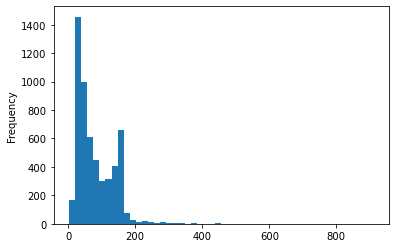

In [11]:
messeges["length"].plot.hist(bins=50)

In [12]:
messeges["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
messeges[messeges["length"] == 910]["messege"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

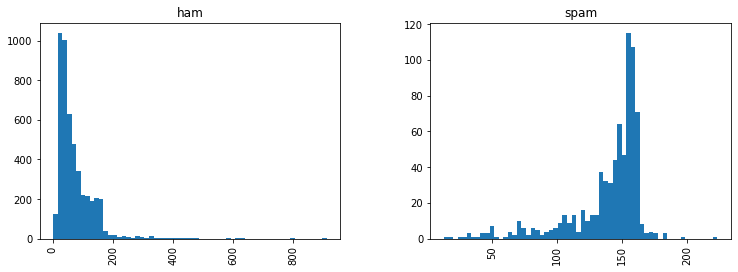

In [14]:
messeges.hist(column="length", by="labels", bins = 60, figsize =(12,4))

In [15]:
import string

In [16]:
test = "This@ is, messege: for test!!"
#string.punctuation # this to remove the ( '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' ) from the word
nopun = [c for c in test if c not in string.punctuation]
print(nopun)

['T', 'h', 'i', 's', ' ', 'i', 's', ' ', 'm', 'e', 's', 's', 'e', 'g', 'e', ' ', 'f', 'o', 'r', ' ', 't', 'e', 's', 't']


In [17]:
nopun = "".join(nopun)
print(nopun)

This is messege for test


In [18]:
from nltk.corpus import stopwords

In [19]:
stopwords.words("english")[:4]

['i', 'me', 'my', 'myself']

In [20]:
clean_mess = [word for word in nopun.split() if word not in stopwords.words("english")]
print(clean_mess)

['This', 'messege', 'test']


In [21]:
def text_process(messege):
    nopunctuation = [char for char in messege if char not in string.punctuation]
    nopunctuation = "".join(nopunctuation)
    return [word for word in nopunctuation.split() if word.lower() not in string.punctuation]

In [22]:
messeges["messege"].head(5).apply(text_process)

0    [Go, until, jurong, point, crazy, Available, o...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, in, 2, a, wkly, comp, to, win, F...
3    [U, dun, say, so, early, hor, U, c, already, t...
4    [Nah, I, dont, think, he, goes, to, usf, he, l...
Name: messege, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messeges["messege"])

In [25]:
print(len(bow_transformer.vocabulary_))

11747


In [26]:
mess4 = messeges["messege"][3]
print(mess4)

U dun say so early hor... U c already then say...


In [27]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4221)	2
  (0, 4828)	1
  (0, 5476)	1
  (0, 6427)	1
  (0, 6447)	1
  (0, 7427)	1
  (0, 9832)	2
  (0, 10174)	1
  (0, 10703)	1


In [28]:
bow_transformer.get_feature_names()[4221]

'U'

In [29]:
messeges_bow = bow_transformer.transform(messeges["messege"])

In [31]:
print("This is messeges_bow:", messeges_bow)

This is messeges_bow:   (0, 1133)	1
  (0, 1521)	1
  (0, 2113)	1
  (0, 4853)	1
  (0, 5430)	1
  (0, 5431)	1
  (0, 5985)	1
  (0, 6441)	1
  (0, 7135)	1
  (0, 7166)	1
  (0, 7574)	1
  (0, 7805)	1
  (0, 7919)	1
  (0, 8595)	1
  (0, 8863)	1
  (0, 9192)	1
  (0, 10708)	1
  (0, 11060)	1
  (0, 11269)	1
  (0, 11480)	1
  (1, 2535)	1
  (1, 3177)	1
  (1, 7952)	1
  (1, 8858)	1
  (1, 10996)	1
  :	:
  (5570, 5465)	1
  (5570, 6230)	1
  (5570, 6507)	1
  (5570, 6880)	1
  (5570, 6926)	1
  (5570, 7028)	1
  (5570, 7213)	1
  (5570, 7290)	1
  (5570, 7530)	1
  (5570, 7574)	1
  (5570, 7639)	1
  (5570, 7693)	1
  (5570, 8051)	1
  (5570, 8679)	1
  (5570, 10187)	1
  (5570, 10197)	1
  (5570, 10815)	1
  (5570, 11088)	1
  (5570, 11311)	1
  (5571, 2472)	1
  (5571, 3553)	1
  (5571, 7710)	1
  (5571, 8607)	1
  (5571, 10815)	1
  (5571, 10946)	1


In [33]:
messeges_bow.nnz

79463

In [40]:
sparsity = round((100.0 * messeges_bow.nnz / (messeges_bow.shape[0] * messeges_bow.shape[1])))
print("Sparsity: {}".format(sparsity) )

Sparsity: 0


In [41]:
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
tfid_transformer = TfidfTransformer().fit(messeges_bow)

In [43]:
tfid4 = tfid_transformer.transform(bow4)

In [44]:
print(tfid4)

  (0, 10703)	0.2214828525636521
  (0, 10174)	0.19345051326676527
  (0, 9832)	0.5147493130794172
  (0, 7427)	0.41952836023632145
  (0, 6447)	0.3046289560740644
  (0, 6427)	0.28629349827015765
  (0, 5476)	0.2841540501592932
  (0, 4828)	0.25442769469153637
  (0, 4221)	0.3902711884065556


In [45]:
tfid_transformer.idf_[bow_transformer.vocabulary_["university"]]

8.527076498901426

In [46]:
messeges_tfidf = tfid_transformer.transform(messeges_bow)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model = MultinomialNB().fit(messeges_tfidf, messeges["labels"])

In [49]:
spam_detect_model.predict(tfid4)[0]

'ham'

In [50]:
messeges["labels"][3]

'ham'

In [51]:
all_pred = spam_detect_model.predict(messeges_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
msg_train,msg_test,label_train,label_test = train_test_split(messeges["messege"], messeges["labels"], test_size = 0.3)

In [64]:
# you dont have to do all the above 
from sklearn.pipeline import Pipeline
# if you want another method you can do: from sklearn.ensemble import randomforestclassifier 

In [65]:
pipeline = Pipeline([
    ("bow", CountVectorizer(analyzer=text_process)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
]) # and then you put the classifier randomforestclassifier()

In [68]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000206B8DA5040>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [71]:
prediction = pipeline.predict(msg_test)

In [70]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(label_test ,prediction))

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1465
        spam       1.00      0.58      0.73       207

    accuracy                           0.95      1672
   macro avg       0.97      0.79      0.85      1672
weighted avg       0.95      0.95      0.94      1672

